<a href="https://colab.research.google.com/github/aebongbing/ESAA/blob/main/20230926_%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%88%98%EC%A0%95%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#matplotlib 한글 깨짐방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train=pd.read_csv("/content/movies_train.csv")
test=pd.read_csv("/content/movies_test.csv")
submission=pd.read_csv("/content/submission.csv")

In [ ]:
#결측값을 모두 0으로 채우기
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
#release_time을 datetime형식으로 변환
train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

#스텝수와 주연배우수

##사용변수: num_staff, num_actor



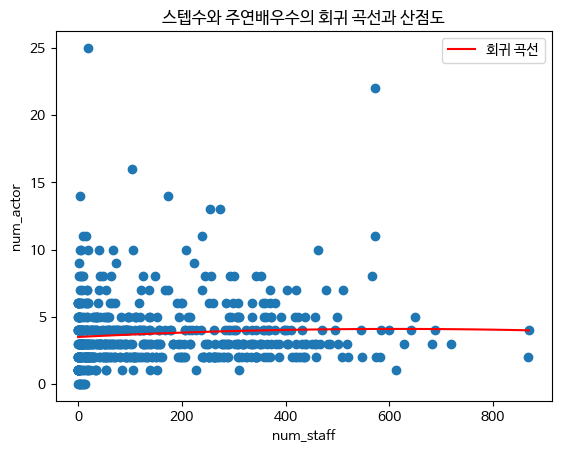

In [ ]:
# 샘플 데이터 생성
x = np.array(train['num_staff'], dtype=float)  # 'num_staff' 열을 숫자로 변환
y = np.array(train['num_actor'], dtype=float)  # 'num_actor' 열을 숫자로 변환

# 다항 회귀 모델 생성 (예시로 2차 다항식 사용)
coefficients = np.polyfit(x, y, 2)  # 2차 다항식으로 회귀 모델 생성
poly = np.poly1d(coefficients)

# x 범위 설정
x_range = np.linspace(min(x), max(x), max(train['num_actor']))

# 다항 회귀 곡선 계산
y_pred = poly(x_range)

# 산점도와 회귀 곡선 그리기
plt.scatter(x, y)
plt.plot(x_range, y_pred, color='red', label='회귀 곡선')
plt.xlabel('num_staff')
plt.ylabel('num_actor')
plt.title('스텝수와 주연배우수의 회귀 곡선과 산점도')
plt.legend()
plt.show()

스텝수가 많은 영화일수록 비용을 줄이기 위해 주연배우수가 적을 것이라는 가설을 세웠다. num_staff와 num_actor 두 가지 변수를 이용하여 만든 산점도와 회귀 그래프를 분석한 결과, 두 변수간의 유의미한 상관관계가 보이지 않는다. 따라서 해당 가설을 기각한다.

#감독의 명성, 전작들의 관객수 그리고 주연배우수

##사용변수: dir_prev_bfnum, director, num_actor


<Figure size 1200x600 with 0 Axes>

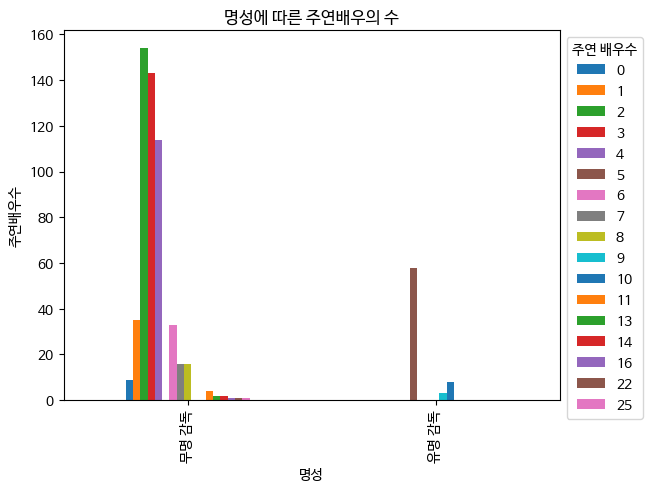

In [ ]:
# 'dir_prev_bfnum' 열의 데이터 타입을 float로 변환
train['dir_prev_bfnum'] = train['dir_prev_bfnum'].astype(float)

# 각 감독의 'dir_prev_bfnum'의 평균을 계산
mean_dir_prev_bfnum_per_director = train.groupby('director')['dir_prev_bfnum'].mean()

# 모든 감독의 평균 'dir_prev_bfnum' 값을 다시 평균
overall_mean_dir_prev_bfnum = mean_dir_prev_bfnum_per_director.mean()

# 유명 감독 무명 감독 정의
def dir_famous(director):
    if mean_dir_prev_bfnum_per_director[director] <= overall_mean_dir_prev_bfnum:
        return '무명 감독'
    else:
        return '유명 감독'

# 주연 배우수를 기반으로 명성 열 추가
train['fame'] = train['num_actor'].apply(dir_famous)

# 명성에 따은 주연배우의 수
fame_actor_counts = train.groupby(['fame','num_actor']).size().unstack().fillna(0)

# 시각화
plt.figure(figsize=(12, 6))
fame_actor_counts.plot(kind='bar')
plt.title('명성에 따른 주연배우의 수')
plt.xlabel('명성')
plt.ylabel('주연배우수')
plt.legend(title='주연 배우수', bbox_to_anchor=(1, 1))
plt.show()


대중적으로 유명한 감독일수록 몸값이 높은 탑스타를 주연으로 쓸 것이기 떄문에 주연배우수가 적을 것이라는 가설을 세운다. 감독별 전작들의 관객수의 평균을 기준으로 유명 감독과 무명 감독을 나누고 명성에 따른 주연 배우수를 그래프로 그린 결과, 무명감독이 훨씬 많은 수의 주연 배우를 쓴다는 것을 알 수 있다. 따라서 해당 가설은 채택된다.

# 명성에 따른 관객수와 전작들의 수

##사용변수: fame (2번 문제에서 새로 만든 변수), box_off_num, dir_prev_num

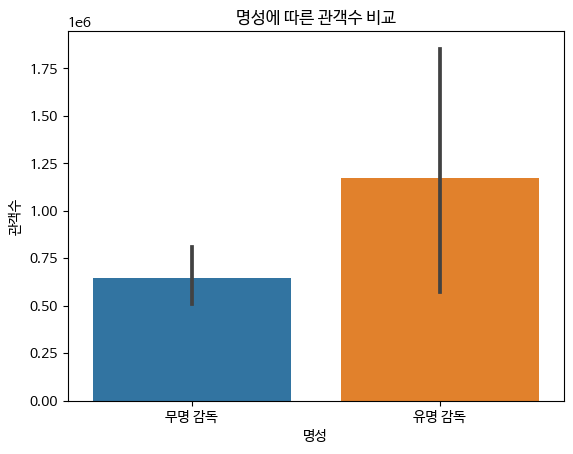

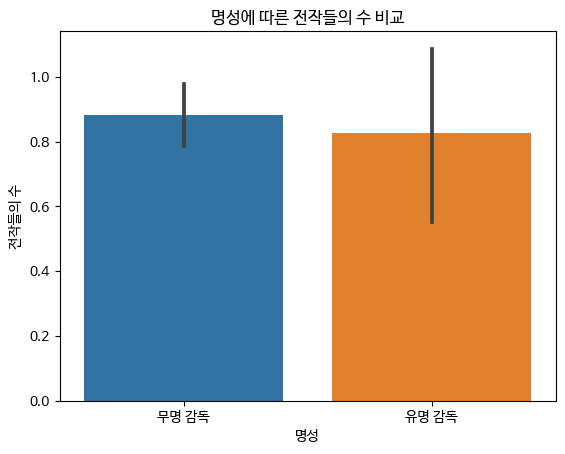

In [ ]:
#막대 그래프 그리기
sns.barplot(x='fame', y='box_off_num', data=train)
plt.xlabel('명성')
plt.ylabel('관객수')
plt.title('명성에 따른 관객수 비교')
plt.show()

sns.barplot(x='fame', y='dir_prev_num', data=train)
plt.xlabel('명성')
plt.ylabel('전작들의 수')
plt.title('명성에 따른 전작들의 수 비교')
plt.show()

유명 감독이 무명 감독보다 이전에 만든 영화의 수가 더 많고, 해당 영화의 관객수가 많을 것이라는 가설을 세운다. 유명 감독의 관객수가 무명 감독에 비해 더 높은 것은 맞으나 유명 감독과 무명 감독 간의 전작들의 수는 유의미한 차이를 보이지 않는다. 따라서 가설3은 관객수 관련으로는 채택되나 전작들의 수에 관해서는 기각된다.

# 명성에 따른 평균 상영시간 비교

## 사용변수: time, fame

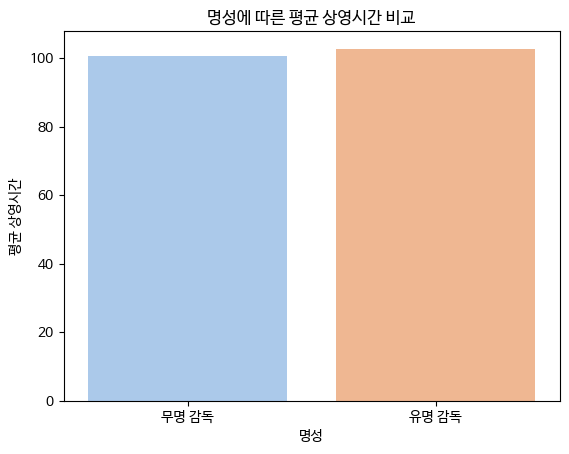

In [ ]:
# 'time' 열의 데이터 타입을 float로 변환
train['time'] = train['time'].astype(float)

# 명성에 따른 평균 상영시간 구하기
train['mean_time'] = train.groupby('fame')['time'].transform('mean')

# 막대 그래프 그리기
sns.barplot(x='fame', y='mean_time', data=train, palette='pastel')
plt.xlabel('명성')
plt.ylabel('평균 상영시간')
plt.title('명성에 따른 평균 상영시간 비교')
plt.show()

유명 감독은 무명 감독에 비해 더 많은 비용을 투자받아 영화의 평균 상영시간이 더 길 것이라는 가설을 세운다. 유명 감독과 무명 감독간의 평균 상영시간의 차이가 거의 없으므로 해당 가설은 기각된다.